In [1]:
import pandas as pd
import random
from datetime import datetime, timedelta

# Função para gerar CPF aleatório
def gera_cpf():
    cpf = ''.join([str(random.randint(0, 9)) for _ in range(11)])
    return f"{cpf[:3]}.{cpf[3:6]}.{cpf[6:9]}-{cpf[9:]}"

# Lista de categorias de venda e pós-venda
categorias = ['venda', 'pós-venda']

# Gerar dados aleatórios para o DataFrame
dados = {
    'CPF do Cliente': [gera_cpf() for _ in range(100)],  # 100 clientes fictícios
    'Valor': [random.uniform(100, 10000) for _ in range(100)],  # Valores aleatórios entre R$100 e R$10.000
    'Categoria': [random.choice(categorias) for _ in range(100)],  # Escolha aleatória entre venda e pós-venda
    'Data Venda': [datetime(2019, 1, 1) + timedelta(days=random.randint(0, 1440)) for _ in range(100)]  # Datas de 2019 a 2022
}

# Criar o DataFrame
df = pd.DataFrame(dados)

# Mostrar as primeiras linhas do DataFrame
print(df.head())


   CPF do Cliente        Valor  Categoria Data Venda
0  847.284.042-52   317.455941  pós-venda 2022-03-04
1  764.673.297-62  8803.899936  pós-venda 2022-09-17
2  224.482.689-77  8436.452288      venda 2020-10-23
3  968.981.214-89  6840.510748      venda 2019-08-23
4  435.142.678-69  6997.806026  pós-venda 2022-04-02


TypeError: float() argument must be a string or a number, not 'Period'

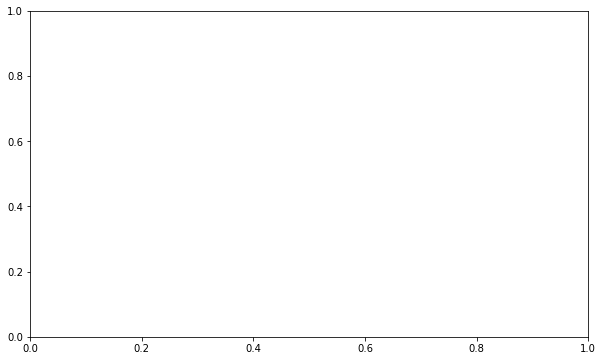

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que 'df' seja o DataFrame que você criou anteriormente

# Converter a coluna 'Data Venda' para o formato de mês e ano
df['Data Venda'] = pd.to_datetime(df['Data Venda'])
df['Ano-Mês'] = df['Data Venda'].dt.to_period('M')

# Criar uma tabela dinâmica para contar clientes únicos por categoria, mês e ano
pivot_table = df.pivot_table(index=['Categoria', 'Ano-Mês'], values='CPF do Cliente', aggfunc=pd.Series.nunique).reset_index()

# Calcular o total de clientes únicos por mês e ano
total_clientes = pivot_table.groupby('Ano-Mês')['CPF do Cliente'].sum().reset_index()

# Plotar o gráfico de linhas
fig, ax = plt.subplots(figsize=(10, 6))

categorias = pivot_table['Categoria'].unique()
for categoria in categorias:
    data_categoria = pivot_table[pivot_table['Categoria'] == categoria]
    ax.plot(data_categoria['Ano-Mês'], data_categoria['CPF do Cliente'], marker='o', label=f'{categoria}')

ax.plot(total_clientes['Ano-Mês'], total_clientes['CPF do Cliente'], marker='o', label='Total', linestyle='--', color='black')

ax.set_xlabel('Ano-Mês')
ax.set_ylabel('Número de Clientes')
ax.set_title('Número de Clientes por Mês e Ano (Venda e Pós-venda)')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


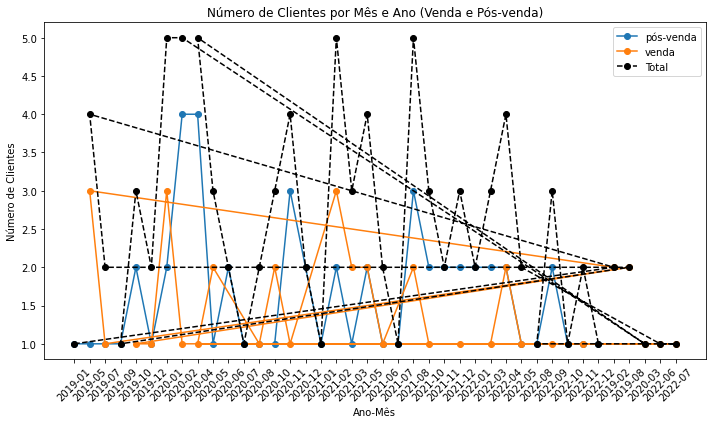

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que 'df' seja o DataFrame que você criou anteriormente

# Converter a coluna 'Data Venda' para o formato de mês e ano
df['Data Venda'] = pd.to_datetime(df['Data Venda'])
df['Ano-Mês'] = df['Data Venda'].dt.to_period('M')

# Criar uma tabela dinâmica para contar clientes únicos por categoria, mês e ano
pivot_table = df.pivot_table(index=['Categoria', 'Ano-Mês'], values='CPF do Cliente', aggfunc=pd.Series.nunique).reset_index()

# Calcular o total de clientes únicos por mês e ano
total_clientes = pivot_table.groupby('Ano-Mês')['CPF do Cliente'].sum().reset_index()

# Recriar o gráfico de linhas
fig, ax = plt.subplots(figsize=(10, 6))

categorias = pivot_table['Categoria'].unique()
for categoria in categorias:
    data_categoria = pivot_table[pivot_table['Categoria'] == categoria]
    ax.plot(data_categoria['Ano-Mês'].astype(str), data_categoria['CPF do Cliente'], marker='o', label=f'{categoria}')

ax.plot(total_clientes['Ano-Mês'].astype(str), total_clientes['CPF do Cliente'], marker='o', label='Total', linestyle='--', color='black')

ax.set_xlabel('Ano-Mês')
ax.set_ylabel('Número de Clientes')
ax.set_title('Número de Clientes por Mês e Ano (Venda e Pós-venda)')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
